In [0]:
import gym_bandits
import gym
import numpy as np
import math
import random
env = gym.make("BanditTenArmedGaussian-v0")

In [0]:
# number of rounds (iterations)
num_rounds = 5000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

# iterations
n = 100

# Number of arms
K = 10

In [0]:
def UCB(iters):
    
    ucb = np.zeros(10)
    
    #explore all the arms
    if iters < 10:
        return i
    
    else:
        for arm in range(10):
            
            # calculate upper bound
            upper_bound = math.sqrt((2*math.log(sum(count))) / count[arm])
            
            # add upper bound to the Q valyue
            ucb[arm] = Q[arm] + upper_bound
            
        # return the arm which has maximum value
        return (np.argmax(ucb))

In [4]:
R = np.zeros((n, num_rounds))

for _ in range(n):
  for i in range(num_rounds):

    arm = UCB(i)
    
    # receive rewards
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

    R[_][i] = np.mean(Q)
    
print( 'The optimal arm is {}'.format(np.argmax(Q)))
print(R)
R.shape

The optimal arm is 5
[[-0.30761638 -0.08728405  0.10780487 ...  0.15975698  0.15976934
   0.15978226]
 [ 0.27261381  0.27025062  0.2682789  ...  0.20160215  0.20161211
   0.2016137 ]
 [ 0.24033322  0.23569452  0.23236997 ...  0.17828815  0.17828008
   0.17828901]
 ...
 [ 0.44970463  0.4498288   0.44972623 ...  0.44850957  0.44850991
   0.4485099 ]
 [ 0.44994488  0.44961696  0.44968961 ...  0.45022389  0.45022403
   0.45022425]
 [ 0.4492093   0.44875392  0.44844957 ...  0.45270647  0.45270648
   0.45270648]]


(100, 5000)

In [5]:
l = R.mean(0)
print(l)
len(l)

[0.41460886 0.41676146 0.41878887 ... 0.41979153 0.41979173 0.41979198]


5000

Text(0, 0.5, 'Reward for UCB 1')

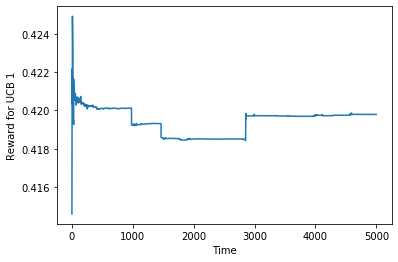

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(l)
plt.xlabel('Time')
plt.ylabel('Reward for UCB 1')